In [40]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing the data set
df = pd.read_csv('cricketDataset.csv')

In [ ]:
# checking the head records
df.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"


In [ ]:
# checking for missing values
missing_values = df.isnull()
print(missing_values)

      Scorecard  Team 1  Team 2  Winner  Margin  Ground  Match Date
0         False   False   False   False   False   False       False
1         False   False   False   False   False   False       False
2         False   False   False   False   False   False       False
3         False   False   False   False   False   False       False
4         False   False   False   False   False   False       False
...         ...     ...     ...     ...     ...     ...         ...
3927      False   False   False   False   False   False       False
3928      False   False   False   False   False   False       False
3929      False   False   False   False   False   False       False
3930      False   False   False   False   False   False       False
3931      False   False   False   False   False   False       False

[3932 rows x 7 columns]


In [ ]:
#counting missing values

missing_count = df.isnull().sum()
print(missing_count)

Scorecard       0
Team 1          0
Team 2          0
Winner          0
Margin        179
Ground          0
Match Date      0
dtype: int64


In [ ]:
#dropping the missing values 
df = df.dropna()

In [12]:
missing_count = df.isnull().sum()
print(missing_count)

Scorecard     0
Team 1        0
Team 2        0
Winner        0
Margin        0
Ground        0
Match Date    0
dtype: int64


In [16]:
df = df.sort_values(by='Match Date',ascending=False)

print(df)

       Scorecard       Team 1       Team 2       Winner     Margin  \
3188  ODI # 3189      England        India      England  3 wickets   
2884  ODI # 2885      England    Australia    Australia  6 wickets   
2040  ODI # 2041     Pakistan   Bangladesh     Pakistan   137 runs   
923    ODI # 924    Australia        India        India    31 runs   
390    ODI # 391        India    Australia    Australia  3 wickets   
...          ...          ...          ...          ...        ...   
1300  ODI # 1301  West Indies      England  West Indies   1 wicket   
1299  ODI # 1300        India    Australia        India    41 runs   
991    ODI # 992  New Zealand    Sri Lanka    Sri Lanka    51 runs   
516    ODI # 517        India  New Zealand        India    52 runs   
257    ODI # 258    Sri Lanka  New Zealand  New Zealand    86 runs   

             Ground   Match Date  
3188       The Oval  Sep 9, 2011  
2884    Southampton  Sep 9, 2009  
2040         Multan  Sep 9, 2003  
923   Colombo (RPS)

In [17]:
df.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
3188,ODI # 3189,England,India,England,3 wickets,The Oval,"Sep 9, 2011"
2884,ODI # 2885,England,Australia,Australia,6 wickets,Southampton,"Sep 9, 2009"
2040,ODI # 2041,Pakistan,Bangladesh,Pakistan,137 runs,Multan,"Sep 9, 2003"
923,ODI # 924,Australia,India,India,31 runs,Colombo (RPS),"Sep 9, 1994"
390,ODI # 391,India,Australia,Australia,3 wickets,Srinagar,"Sep 9, 1986"


In [56]:
df['Year'] = df['Match Date'].str[-4:]
df.head()

winning_team = df.query("Year=='1971'")['Winner'].value_counts().idxmax()
print()
print(f"The winning team in 1971 was: {winning_team}")


The winning team in 1971 was: Australia


In [61]:
#Number of time matches won by New Zealand

won=df.query("Winner=='New Zealand'")
won=won['Winner'].count()
print()
print("No.of times won by New Zealand according to this dataset = ",won)


No.of times won by New Zealand according to this dataset =  324


In [62]:
#total of matches won by india

years=df.query("Winner=='India'").sort_values(by='Year')
years=years[['Winner','Year']]
years.count()

Winner    475
Year      475
dtype: int64

In [63]:
#to find in which margin Australia won in 1972

margin=df.query("Year=='1972' and Winner=='Australia'")
#margin=margin['Margin'].reset_index()
margin[['Team 1','Team 2','Winner','Margin','Year']]

,Team 1,Team 2,Winner,Margin,Year
2,England,Australia,Australia,5 wickets,1972


In [18]:
filtered_df = df[df['Margin'].str.contains('runs', na=False)]
print(filtered_df)

       Scorecard       Team 1       Team 2       Winner    Margin  \
2040  ODI # 2041     Pakistan   Bangladesh     Pakistan  137 runs   
923    ODI # 924    Australia        India        India   31 runs   
3681  ODI # 3682      England    Australia      England   93 runs   
3411  ODI # 3412      England    Australia    Australia   88 runs   
3187  ODI # 3188     Zimbabwe     Pakistan     Pakistan    5 runs   
...          ...          ...          ...          ...       ...   
1583  ODI # 1584  West Indies     Zimbabwe  West Indies   87 runs   
1299  ODI # 1300        India    Australia        India   41 runs   
991    ODI # 992  New Zealand    Sri Lanka    Sri Lanka   51 runs   
516    ODI # 517        India  New Zealand        India   52 runs   
257    ODI # 258    Sri Lanka  New Zealand  New Zealand   86 runs   

             Ground   Match Date  
2040         Multan  Sep 9, 2003  
923   Colombo (RPS)  Sep 9, 1994  
3681     Manchester  Sep 8, 2015  
3411     Manchester  Sep 8, 201

In [64]:
# filterd data where winner team is Australia

winner_team = df[df['Winner'] == 'Australia']
print(winner_team)


       Scorecard        Team 1     Team 2     Winner     Margin  \
2884  ODI # 2885       England  Australia  Australia  6 wickets   
390    ODI # 391         India  Australia  Australia  3 wickets   
3411  ODI # 3412       England  Australia  Australia    88 runs   
922    ODI # 923     Australia   Pakistan  Australia    28 runs   
2882  ODI # 2883       England  Australia  Australia    39 runs   
...          ...           ...        ...        ...        ...   
2569  ODI # 2570     Australia    Ireland  Australia  9 wickets   
48      ODI # 49   West Indies  Australia  Australia  2 wickets   
3149  ODI # 3150    Bangladesh  Australia  Australia  9 wickets   
1312  ODI # 1313     Australia   Zimbabwe  Australia    16 runs   
1196  ODI # 1197  South Africa  Australia  Australia  5 wickets   

             Ground    Match Date  Margin (runs)  Year  
2884    Southampton   Sep 9, 2009            6.0  2009  
390        Srinagar   Sep 9, 1986            3.0  1986  
3411     Manchester   Se

In [65]:
# filterd data where winner team is India

winner_team = df[df['Winner'] == 'India']
print(winner_team)


       Scorecard      Team 1       Team 2 Winner     Margin         Ground  \
923    ODI # 924   Australia        India  India    31 runs  Colombo (RPS)   
389    ODI # 390       India    Australia  India  7 wickets         Jaipur   
2618  ODI # 2619     England        India  India  2 wickets       The Oval   
2166  ODI # 2167     England        India  India    23 runs         Lord's   
2279  ODI # 2280    Zimbabwe        India  India  4 wickets         Harare   
...          ...         ...          ...    ...        ...            ...   
2000  ODI # 2001  Bangladesh        India  India   200 runs          Dhaka   
1431  ODI # 1432     England        India  India     9 runs        Sharjah   
380    ODI # 381       India  New Zealand  India  3 wickets        Sharjah   
1299  ODI # 1300       India    Australia  India    41 runs          Kochi   
516    ODI # 517       India  New Zealand  India    52 runs        Sharjah   

        Match Date  Margin (runs)  Year  
923    Sep 9, 1994   

C:\Users\INAYAT IT SERVICES\AppData\Local\Temp\ipykernel_8480\3676218674.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winner_counts.index, y=winner_counts.values, palette='viridis')


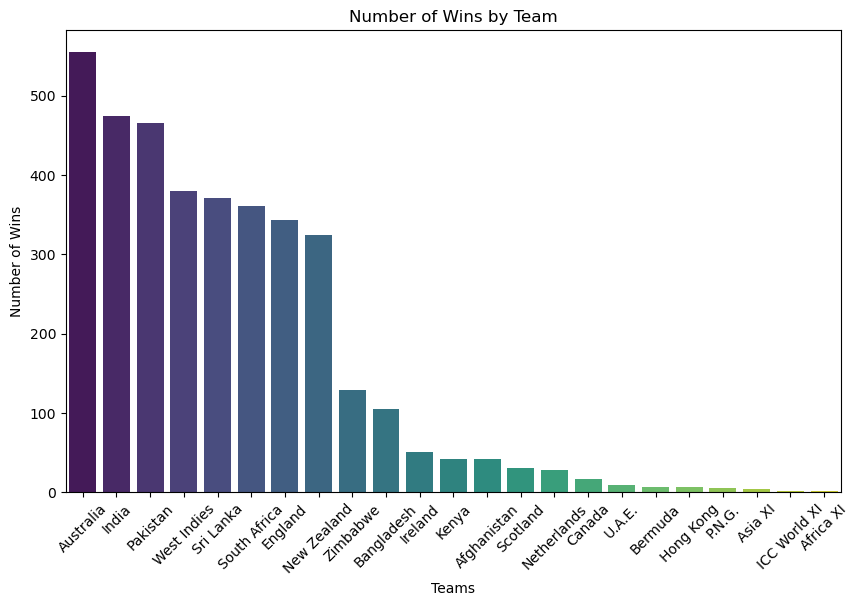

In [66]:
winner_counts = df['Winner'].value_counts()


plt.figure(figsize=(10,6))
sns.barplot(x=winner_counts.index, y=winner_counts.values, palette='viridis')
plt.title('Number of Wins by Team')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()

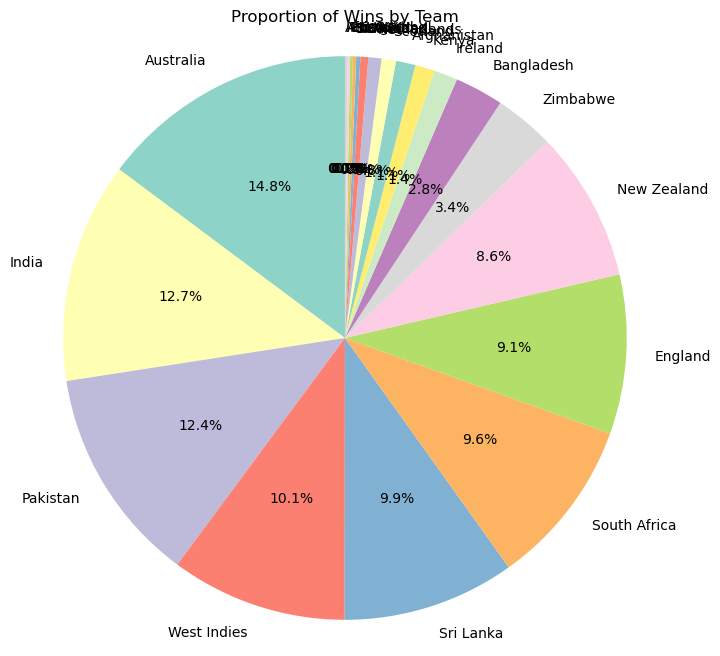

In [67]:

plt.figure(figsize=(8,8))
plt.pie(winner_counts, labels=winner_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Proportion of Wins by Team')
plt.axis('equal')  
plt.show()


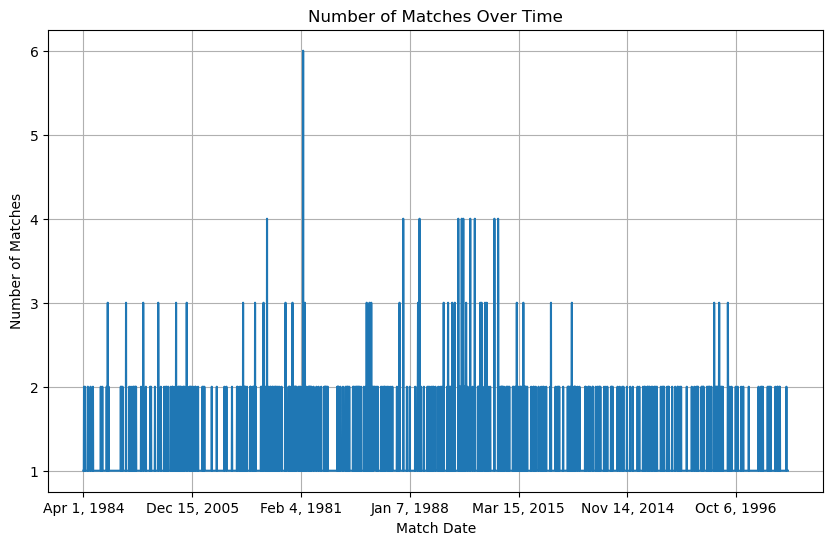

In [68]:

matches_per_date = df.groupby('Match Date').size()
plt.figure(figsize=(10,6))
matches_per_date.plot(kind='line')
plt.title('Number of Matches Over Time')
plt.xlabel('Match Date')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()


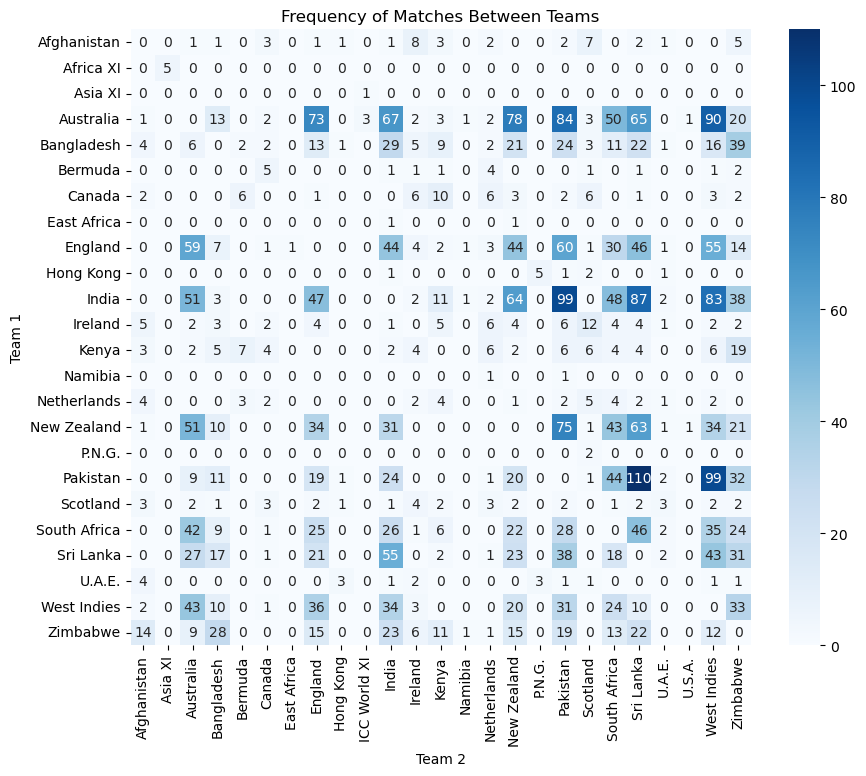

In [69]:
match_matrix = pd.crosstab(df['Team 1'], df['Team 2'])


plt.figure(figsize=(10,8))
sns.heatmap(match_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Frequency of Matches Between Teams')
plt.xlabel('Team 2')
plt.ylabel('Team 1')
plt.show()


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\INAYAT IT SERVICES\AppData\Local\Temp\ipykernel_8480\118325808.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Margin (runs)'] = df['Margin'].str.extract('(\d+)').astype(float)


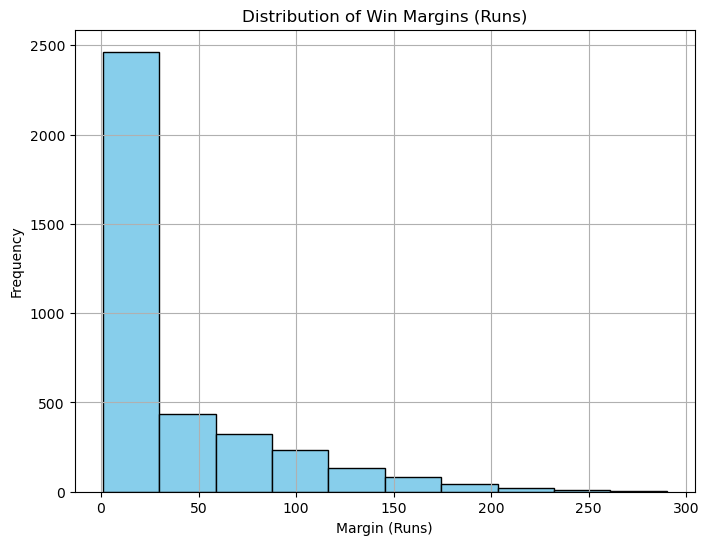

In [70]:
df['Margin (runs)'] = df['Margin'].str.extract('(\d+)').astype(float)


plt.figure(figsize=(8,6))
df['Margin (runs)'].dropna().plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Win Margins (Runs)')
plt.xlabel('Margin (Runs)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


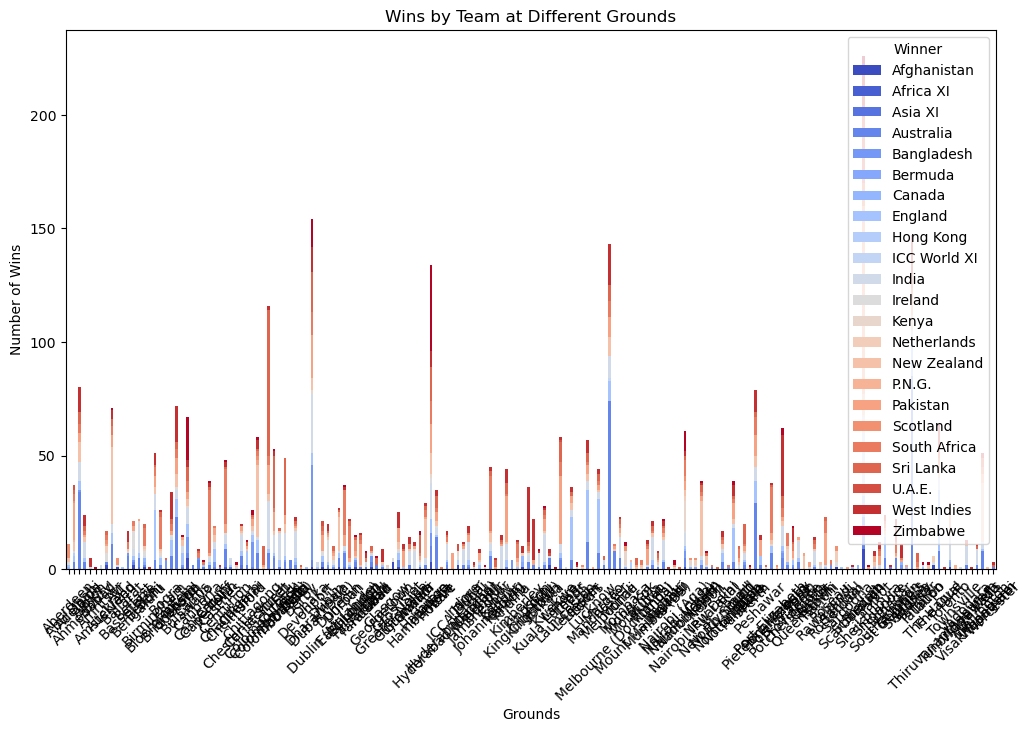

In [71]:
wins_by_ground = pd.crosstab(df['Ground'], df['Winner'])

wins_by_ground.plot(kind='bar', figsize=(12,7), stacked=True, colormap='coolwarm')
plt.title('Wins by Team at Different Grounds')
plt.xlabel('Grounds')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()


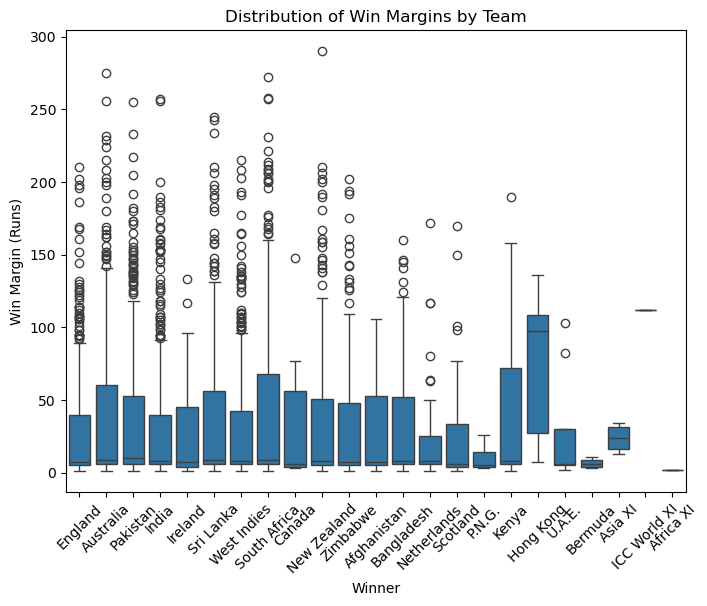

In [72]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Winner', y='Margin (runs)', data=df)
plt.title('Distribution of Win Margins by Team')
plt.xlabel('Winner')
plt.ylabel('Win Margin (Runs)')
plt.xticks(rotation=45)
plt.show()
